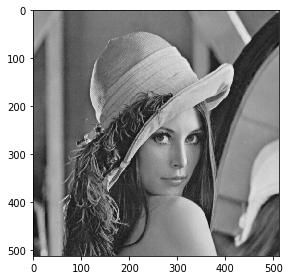

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d


from skimage import io
from skimage.color import rgb2gray
from skimage.util.dtype import dtype_range

#讀取圖片並改成黑白
img = io.imread('Lenna.jpg')
io.imshow(img)
img = rgb2gray(img)
io.imshow(img)
img*=255

In [2]:
def Kuwahara(original, winsize):
    image = original.astype(np.float64)
    # make sure window size is correct
    if winsize %4 != 1:
        raise Exception ("Invalid winsize %s: winsize must follow formula: w = 4*n+1." %winsize)

    #創造出一個三角(尖角朝向右邊)
    tmpSquare=np.zeros((winsize,winsize))
    for i in range(winsize):
        for j in range(winsize):
            if(j<=i and j<winsize-i):
                tmpSquare[i,j]=1
    #平均濾波
    tmpavgker = tmpSquare/np.sum(tmpSquare)
    # we build a vector of convolution kernels for computing average and
    # variance
    avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    avgker[0] = tmpavgker			# 尖角朝向右邊
    avgker[1] = np.fliplr(tmpavgker)	# 尖角朝向左邊
    avgker[2] = np.rot90(tmpavgker)	# 尖角朝向上面
    avgker[3] = np.flipud(avgker[2])	# 尖角朝向下面
    # Create a pixel-by-pixel square of the image
    squaredImg = image**2
    # preallocate these arrays to make it apparently %15 faster
    avgs = np.zeros([4, image.shape[0],image.shape[1]])
    stddevs = avgs.copy()
    # 計算三角區域的平均和變異數
    for k in range(4):
        # 計算平均(期望值)
        avgs[k] = convolve2d(image, avgker[k],mode='same')
        # 計算平方的期望值
        stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same')
        # 變異數公式:var(X)=E[X^2]-(E[X])^2
        stddevs[k] = stddevs[k]-avgs[k]**2
     # 選變異數最小的
    indices = np.argmin(stddevs,0) # returns index of subwindow with smallest variance

    # Building the filtered image (with nested for loops)
    filtered = np.zeros(original.shape)
    for row in range(original.shape[0]):
        for col in range(original.shape[1]):
            filtered[row,col] = avgs[indices[row,col], row,col]
    #filtered=filtered.astype(np.uint8)
    return filtered.astype(np.uint8)

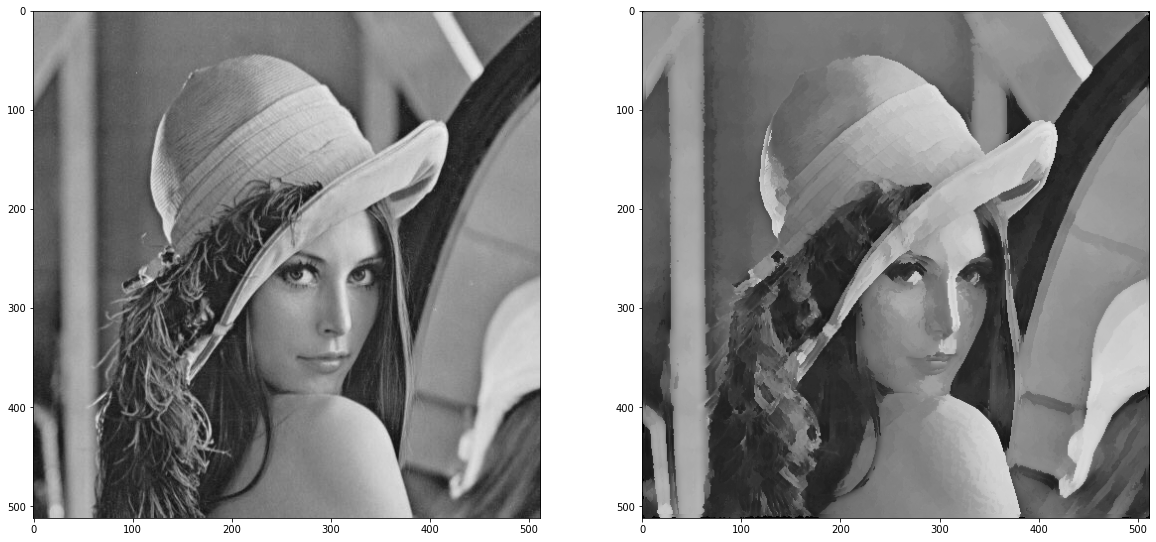

In [3]:
cK=Kuwahara(img,9)


fig = plt.figure(figsize=(20, 20))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(img/255,vmax=1.0,vmin=0.0)
ax2.imshow(cK/255,vmax=1.0,vmin=0.0)

plt.show()
